In [1]:
import pandas as pd
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.max_columns = 99
pd.options.display.max_rows = 999

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from IPython.display import Markdown as md



In [2]:
data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2019-2020.csv')#.sample(frac = .1)
data['Grupo Etario'] = pd.cut(data.P03, np.arange(-1, 80, 3))#.round(-1) ## Customizar grupo etario

data = data.merge(radio_ref, on = ['RADIO_REF_ID', 'AGLOMERADO'])
data['AGLO_si'] = data.AGLOMERADO != 0


## Coversion a pesos de AGO 20, cuando fue elaborado el informe de INDEC
cpi = pd.read_csv('./../data/info/indice_precios_d.csv', index_col=0)

from datetime import datetime
hoy = datetime.today().strftime('%Y-%m-%d')

# Ratio de precios de hoy con respecto a precios con indice en base modelo
ix = cpi.loc[hoy].values[0]/cpi.loc['2016-01-01'].values[0]
# ix = cpi.loc['2020-09-30'].values[0]/cpi.loc['2016-01-01'].values[0] # Precios del periodo en estudio
ix

columnas_pesos =  ['P47T_persona', 'P47T_hogar', 'CBA', 'gap_indigencia', 'CBT', 'gap_pobreza']
data[columnas_pesos] = ix*data[columnas_pesos]

# Incidencia de la pobreza y la indigencia en 31 aglomerados urbanos
## Segundo semestre de 2020

In [38]:
print('Todos los valores en pesos argentinos (ARS) del '+hoy+' (aaaa-mm-dd)')
print('Fuente del dato primario: INDEC, www.indec.gob.ar')

Todos los valores en pesos argentinos (ARS) del 2021-05-04 (aaaa-mm-dd)
Fuente del dato primario: INDEC, www.indec.gob.ar


In [3]:
img = mpimg.imread('./../images/indec_pobreza_template.png')

In [4]:
n_ = data.groupby(['AGLO_si', 'Q'])[['HOGAR_REF_ID', 'PERSONA_REF_ID']].nunique()

In [5]:
n_trims = 4

# variables
mn_n_aglo = (n_.loc[True]/frac).mean()

n_hogares_eph = mn_n_aglo.loc['HOGAR_REF_ID']
n_personas_eph = mn_n_aglo.loc['PERSONA_REF_ID']

data_sel = data.loc[(data.AGLO_si) & (data.Q.isin(['2020-02-15', '2020-05-15']))]

## Pobreza
pob_cnt = (data_sel.groupby(['Pobreza', 'Q'])[['PERSONA_REF_ID', 'HOGAR_REF_ID']].nunique()/frac)  ## ojo porque mal groupby Q suma hogares que puedieron ser pobres en distintos trimestres
pob_cnt = pob_cnt.groupby(level = 'Pobreza').mean()
pob_pct = pob_cnt/pob_cnt.sum()

## Indigencia
idg_cnt = (data_sel.groupby(['Indigencia', 'Q'])[['PERSONA_REF_ID', 'HOGAR_REF_ID']].nunique()/frac)  ## ojo porque mal groupby Q suma hogares que puedieron ser pobres en distintos trimestres
idg_cnt = idg_cnt.groupby(level = 'Indigencia').mean()
idg_pct = idg_cnt/idg_cnt.sum()

## Pobres no Indigentes
pni_cnt = (data_sel.groupby(['Indigencia', 'Pobreza', 'Q'])[['PERSONA_REF_ID', 'HOGAR_REF_ID']].nunique()/frac)  ## ojo porque mal groupby Q suma hogares que puedieron ser pobres en distintos trimestres
pni_cnt = pni_cnt.groupby(level = ['Pobreza','Indigencia']).mean()
pni_pct = pni_cnt/pni_cnt.sum()

# idg_cnt = idg_cnt.groupby(level = 'Indigencia').mean()
# idg_pct = idg_cnt/idg_cnt.sum()


# h_pob_cnt.round(-4).astype(int).unstack()

# ### Porcentaje
# n_trims*(100*h_pob_cnt/h_pob_cnt.sum()).round(1).unstack()

In [6]:

# Tamaño promedio del hogar POBRE
pob_ix_tot = data_sel.loc[data_sel.Pobreza].groupby(['HOGAR_REF_ID', 'Q']).size().mean()

# 'Ingreso total familiar promedio' y 'Canasta básica total promedio del hogar' POBRE
pob_ITF = data_sel.loc[data_sel.Pobreza][['HOGAR_REF_ID', 'P47T_hogar', 'CBT', 'gap_pobreza']].drop_duplicates().drop('HOGAR_REF_ID', axis = 1).median()
# pob_ITF = pob_ITF/ix


# Tamaño promedio del hogar INDIGENTE
idg_ix_tot = data_sel.loc[data_sel.Indigencia].groupby(['HOGAR_REF_ID', 'Q']).size().mean()

# 'Ingreso total familiar promedio' y 'Canasta básica total promedio del hogar' INDIGENTE
idg_ITF = data_sel.loc[data_sel.Indigencia][['HOGAR_REF_ID', 'P47T_hogar', 'CBA', 'gap_indigencia']].drop_duplicates().drop('HOGAR_REF_ID', axis = 1).median()
# idg_ITF = idg_ITF/ix


In [7]:
#Pobreza
pob_n_h = pob_cnt.loc[True].HOGAR_REF_ID
pob_pct_h = pob_pct.loc[True].HOGAR_REF_ID

pob_n_p = pob_cnt.loc[True].PERSONA_REF_ID
pob_pct_p = pob_pct.loc[True].PERSONA_REF_ID

#Indigencia
idg_n_h = idg_cnt.loc[True].HOGAR_REF_ID
idg_pct_h = idg_pct.loc[True].HOGAR_REF_ID

idg_n_p = idg_cnt.loc[True].PERSONA_REF_ID
idg_pct_p = idg_pct.loc[True].PERSONA_REF_ID

# Pobres no indigentes
pni_n_h = pni_cnt.loc[True, False].HOGAR_REF_ID
pni_pct_h = pni_pct.loc[True, False].HOGAR_REF_ID

pni_n_p = pni_cnt.loc[True, False].PERSONA_REF_ID
pni_pct_p = pni_pct.loc[True, False].PERSONA_REF_ID

# No Pobreza
nopob_n_h = pob_cnt.loc[False].HOGAR_REF_ID
nopob_pct_h = pob_pct.loc[False].HOGAR_REF_ID

nopob_n_p = pob_cnt.loc[False].PERSONA_REF_ID
nopob_pct_p = pob_pct.loc[False].PERSONA_REF_ID

## Ingresos y Canasta
pob_P47T_hogar = pob_ITF.P47T_hogar
pob_CBT = pob_ITF.CBT

idg_P47T_hogar = idg_ITF.P47T_hogar
idg_CBA = idg_ITF.CBA

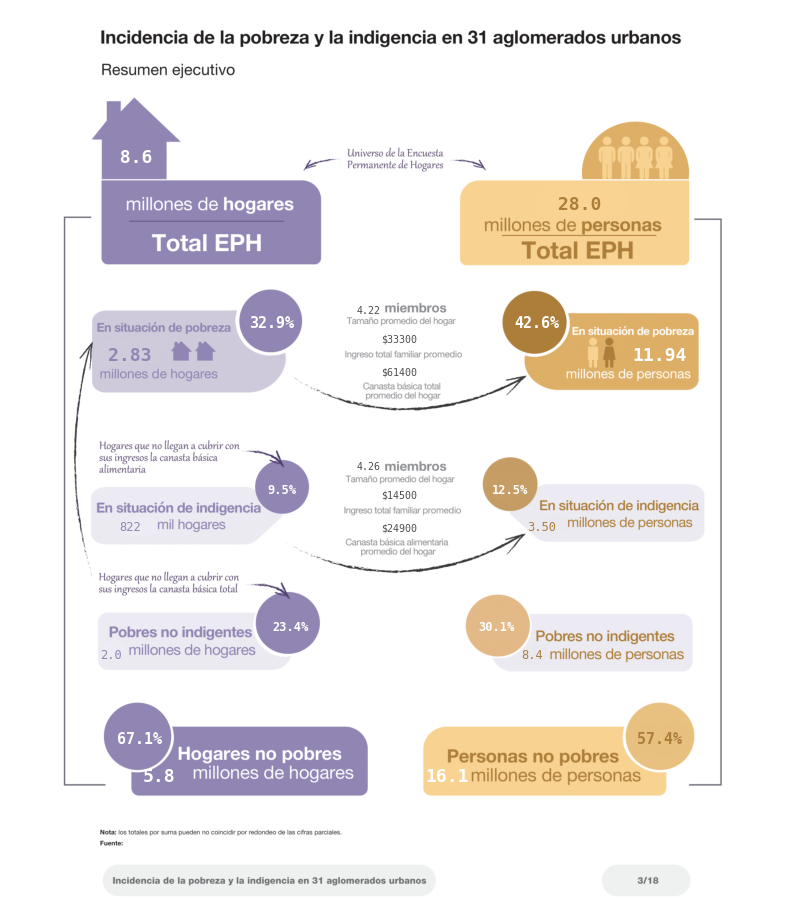

Diseno Grafico: INDEC


In [8]:
family = 'monospace'
# fig, axs = plt.subplots(1, figsize = (20, 30))
fig, axs = plt.subplots(1, figsize = (14, 25))
imgplot = axs.imshow(img)

pr_ = '#9185b3' # purpura oscuro indec
yl_ = '#AD7E3A' # amarillo oscuro indec
# yl_ = '#f7d18f' # amarillo clarito indec

bbox = dict(boxstyle="square", fc='None', ec = 'None')
# n_hogares
axs.annotate(f"{n_hogares_eph/1e6:5.1f}", xy=(250, 750), bbox=bbox, c = 'w', weight='bold', fontsize = 18, ha = 'center', family = family)
# n_personas
axs.annotate(f"{n_personas_eph/1e6:5.1f}", xy=(1200, 850), bbox=bbox, c = yl_, weight='bold', fontsize = 18, ha = 'center', family = family)

##########################################

# n_hogares en pobreza
axs.annotate(f"{pob_n_h/1e6:0.2f}", xy=(260, 1170), bbox=bbox, c = pr_, weight='bold', fontsize = 18, ha = 'center', family = family)
# pct_hogares en pobreza
axs.annotate(f"{pob_pct_h:0.1%}", xy=(560, 1100), bbox=bbox, c = 'w', weight='bold', fontsize = 15, ha = 'center', family = family)

# n_personas en pobreza
axs.annotate(f"{pob_n_p/1e6:0.2f}", xy=(1380, 1170), bbox=bbox, c = 'w', weight='bold', fontsize = 18, ha = 'center', family = family)
# pct_personas en pobreza
axs.annotate(f"{pob_pct_p:0.1%}", xy=(1120, 1100), bbox=bbox, c = 'w', weight='bold', fontsize = 15, ha = 'center', family = family)
##########################################

# Porcentajes indigencia
# pct_hogares en indigencia
axs.annotate(f"{idg_pct_h:0.1%}", xy=(580, 1450), bbox=bbox, c = 'w', weight='bold', fontsize = 12, ha = 'center', family = family)
# pct_personas en indigencia
axs.annotate(f"{idg_pct_p:0.1%}", xy=(1065, 1450), bbox=bbox, c = 'w', weight='bold', fontsize = 12, ha = 'center', family = family)

# numeros indigencia
# n_hogares en indigencia
axs.annotate(f"{idg_n_h/1e3:0.0f}", xy=(260, 1530), bbox=bbox, c = pr_, fontsize = 12, ha = 'center', family = family)
# n_personas en indigencia
axs.annotate(f"{idg_n_p/1e6:0.2f}", xy=(1130, 1530), bbox=bbox, c = yl_, fontsize = 12, ha = 'center', family = family)
##########################################

# Porcentajes PNI
# pct_hogares en PNI
axs.annotate(f"{pni_pct_h:0.1%}", xy=(600, 1740), bbox=bbox, c = 'w', weight='bold', fontsize = 12, ha = 'center', family = family)
# pct_personas en indigencia
axs.annotate(f"{pni_pct_p:0.1%}", xy=(1035, 1740), bbox=bbox, c = 'w', weight='bold', fontsize = 12, ha = 'center', family = family)

# numeros PNI
# n_hogares en PNI
axs.annotate(f"{pni_n_h/1e6:0.1f}", xy=(220, 1800), bbox=bbox, c = pr_, fontsize = 12, ha = 'center', family = family)
# n_personas en PNI
axs.annotate(f"{pni_n_p/1e6:0.1f}", xy=(1110, 1800), bbox=bbox, c = yl_, fontsize = 12, ha = 'center', family = family)

##########################################

# n_hogares NO pobreza
axs.annotate(f"{nopob_n_h/1e6:0.1f}", xy=(320, 2060), bbox=bbox, c = 'w', weight='bold', fontsize = 18, ha = 'center', family = family)
# pct_hogares NO pobreza
axs.annotate(f"{nopob_pct_h:0.1%}", xy=(280, 1980), bbox=bbox, c = 'w', weight='bold', fontsize = 15, ha = 'center', family = family)

# n_personas NO pobreza
axs.annotate(f"{nopob_n_p/1e6:0.1f}", xy=(930, 2060), bbox=bbox, c = 'w', weight='bold', fontsize = 18, ha = 'center', family = family)
# pct_personas NO pobreza
axs.annotate(f"{nopob_pct_p:0.1%}", xy=(1380, 1980), bbox=bbox, c = yl_, weight='bold', fontsize = 15, ha = 'center', family = family)

##########################################

## Ingresos y Canasta
axs.annotate(f"{pob_ix_tot:0.2f}", xy=(790, 1070), bbox=bbox, c = '.3', fontsize = 10, ha = 'right', family = family)
axs.annotate(f"${np.round(pob_P47T_hogar, -2):0.0f}", xy=(830, 1130), bbox=bbox, c = '.3', fontsize = 10, ha = 'center', family = family)
axs.annotate(f"${np.round(pob_CBT, -2):0.0f}", xy=(830, 1200), bbox=bbox, c = '.3', fontsize = 10, ha = 'center', family = family)

## Ingresos y Canasta
axs.annotate(f"{idg_ix_tot:0.2f}", xy=(790, 1400), bbox=bbox, c = '.3', fontsize = 10, ha = 'right', family = family)
axs.annotate(f"${np.round(idg_P47T_hogar, -2):0.0f}", xy=(830, 1460), bbox=bbox, c = '.3', fontsize = 10, ha = 'center', family = family)
axs.annotate(f"${np.round(idg_CBA, -2):0.0f}", xy=(830, 1530), bbox=bbox, c = '.3', fontsize = 10, ha = 'center', family = family)


# pob_CBT = pob_ITF.CBT

# idg_P47T_hogar = idg_ITF.P47T_hogar
# idg_CBA = idg_ITF.CBA

##########################################

plt.ylim(len(img), 420)
plt.axis('off')
plt.show()

print("Diseno Grafico: INDEC")

## Principales resultados de la incidencia de la pobreza y la indigencia

Los resultados del segundo semestre de 2020 correspondientes al total de aglomerados urbanos registraron que: <br><br>

**Incidencia**

El porcentaje de hogares por debajo de la línea de pobreza (LP) alcanzó el 32.9%; en estos residen el 42.6% de las personas. Dentro de este conjunto se distingue un 9.5% de hogares por debajo de la línea de indigencia (LI), que incluyen al 12.5% de las personas. Esto implica que, para el universo de los 31 aglomerados urbanos de la EPH, por debajo de la LP se encuentran 2.8 millones de hogares que incluyen a 11.9 millones de personas y, dentro de ese conjunto, 821.7 mil hogares se encuentran por debajo de la LI, e incluyen a 3.50 millones de personas indigentes.

**Evolucion**

Hogares:


Q                            2019-02-28 2019-08-31 2020-02-29 2020-08-31
observable sintetico AGLO_si                                            
Pobreza    mean      True            31       33.3         32       34.3
           sum       True       2645000    2847000    2747000    2949000
Indigencia mean      True           8.7        9.1          9        9.8
           sum       True        741000     781000     767000     845000

Personas:


Q                            2019-02-28 2019-08-31 2020-02-29 2020-08-31
observable sintetico AGLO_si                                            
Pobreza    mean      True            40       42.7       41.1       44.1
           sum       True      11142000   11899000   11491000   12349000
Indigencia mean      True          11.5       12.2       11.9       12.8
           sum       True       3211000    3391000    3325000    3572000

En la comparación interanual el porcentaje de hogares en pobreza aumento en 0.9% p.p. y las personas bajo la línea de pobreza, en 1.3% p.p.; mientras que los hogares indigentes aumentaron en 0.7% y las personas bajo la línea de indigencia, en 0.6% p.p.

Con respecto al primer semestre de 2020, se registró un aumento de la pobreza (2.9% p.p.) mientras que la indigencia registró un aumento (0.8% p.p.) para el conjunto de la población cubierta por la encuesta.

**Canastas - Ingresos**

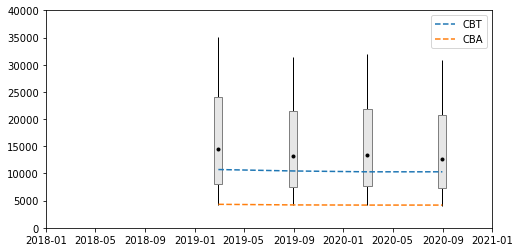

**Brecha**

El ingreso total familiar mediano de los hogares pobres fue de $\$$33300, mientras la CBT mediana del mismo grupo de hogares alcanzó los $\$$61400, la brecha mediana de los hogares pobres fue de $\$$22000.

El ingreso total familiar mediano de los hogares indigentes fue de $\$$14500, mientras la CBA mediana del mismo grupo de hogares alcanzó los $\$$24900, la brecha mediana de los hogares indigentes fue de $\$$8200.

**Grupos de Edad**

En cuanto a los grupos de edad según condición de pobreza, se destaca que 65.2%  de las personas de 0 a 14 años son pobres (cuadro 3.2). El mayor crecimiento con relación al semestre anterior se observó en el grupo de (13.0, 29.0] con un aumento de 3.8% p.p.; y en el grupo de (29.0, 64.0], con una suba de 3.3% p.p. El porcentaje total de pobres para los grupos de 15 a 29 años y de 30 a 64 años es de 50.7% y 35.8%, respectivamente. Entre la población de 65 años y más el 12.1% se ubican bajo la LP.

En cuanto a los grupos de edad según condición de indigencia, se destaca que 22.7%  de las personas de 0 a 14 años son indigentes (cuadro 3.2). El mayor crecimiento con relación al semestre anterior se observó en el grupo de (13.0, 29.0] con un aumento de 1.4% p.p.; y en el grupo de (29.0, 64.0], con una suba de 0.9% p.p. El porcentaje total de indigentes para los grupos de 15 a 29 años y de 30 a 64 años es de 15.0% y 8.6%, respectivamente. Entre la población de 65 años y más el 0.9% se ubican bajo la LI.

**Regiones**

Las mayores incidencias de la pobreza en personas (incluyendo poblacion fuera de aglomerados) se observaron en las regiones Cuyo, Noroeste, Noreste; y las menores, en las regiones Gran Buenos Aires, Patagónica (cuadro 4.1).

In [9]:

display(md("Los resultados del segundo semestre de 2020 correspondientes al total de aglomerados urbanos registraron que: <br><br>"))
           
display(md("**Incidencia**"))
display(md("El porcentaje de hogares por debajo de la línea de pobreza (LP) alcanzó el {:.1%}".format(pob_pct_h)+"; en estos residen el \
{:.1%}".format(pob_pct_p)+" de las personas. Dentro de este conjunto se distingue un {:.1%}".format(idg_pct_h)+" de hogares por debajo de la \
línea de indigencia (LI), que incluyen al {:.1%}".format(idg_pct_p)+" de las personas. Esto implica que, para el universo de \
los 31 aglomerados urbanos de la EPH, por debajo de la LP se encuentran {:.1f}".format(pob_n_h/1e6)+" millones de hogares que \
incluyen a {:.1f}".format(pob_n_p/1e6)+" millones de personas y, dentro de ese conjunto, {:.1f}".format(idg_n_h/1e3)+" mil hogares se encuentran por debajo \
de la LI, e incluyen a {:.2f}".format(idg_n_p/1e6)+" millones de personas indigentes."))


######################################################################

### Evolucion temporal de la indigencia y pobreza.

display(md("**Evolucion**"))


for i, base_str in enumerate(['H', 'P']):
    print(['Hogares:', 'Personas:'][i])
    grouper = ['Q', 'AGLO_si']
    info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()
    info = info.loc[info.AGLO_si]
    info['Q'] = pd.to_datetime(info['Q'])

    table = info.loc[info.observable.isin(['Pobreza', 'Indigencia'])].set_index(grouper + ['sintetico', 'observable'])['valor']
    table = table.unstack([-1, -2, -3])
    table = table.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

    globals()['evolucion_'+base_str+'_anual'] = table.diff(2, 1).iloc[:, -1]
    globals()['evolucion_'+base_str+'_semes'] = table.diff(1, 1).iloc[:, -1]
    
    table.loc[table.index.get_level_values('sintetico') == 'mean'] = 100*table.loc[table.index.get_level_values('sintetico') == 'mean'].round(3)
    table.loc[table.index.get_level_values('sintetico') == 'sum'] = table.loc[table.index.get_level_values('sintetico') == 'sum'].round(-3).astype(int).astype(str)
    table = table.sort_index(axis = 1)
    display(table)

display(md("En la comparación interanual el porcentaje de hogares en pobreza aumento en {:.1%}".format(evolucion_H_anual.loc[('Pobreza', 'mean', True)])+" p.p. y \
las personas bajo la línea de pobreza, en {:.1%}".format(evolucion_P_anual.loc[('Pobreza', 'mean', True)])+" p.p.; mientras que los hogares indigentes aumentaron \
en {:.1%}".format(evolucion_H_anual.loc[('Indigencia', 'mean', True)])+" y \
las personas bajo la línea de indigencia, en {:.1%}".format(evolucion_P_anual.loc[('Indigencia', 'mean', True)])+" p.p."))


display(md("Con respecto al primer semestre de 2020, se registró un aumento de la pobreza ({:.1%}".format(evolucion_P_semes.loc[('Pobreza', 'mean', True)])+" p.p.) \
mientras que la indigencia registró un aumento ({:.1%}".format(evolucion_P_semes.loc[('Indigencia', 'mean', True)])+" p.p.) para el conjunto de la población cubierta \
por la encuesta."))

    
    
######################################################################

### INGRESOS vs CANASTA a Precios Constantes
display(md("**Canastas - Ingresos**"))

# Dado que la incidencia de la pobreza y la indigencia resulta de la capacidad de los hogares de acceder
# a la canasta básica alimentaria (CBA) y a la canasta básica total (CBT) mediante sus ingresos
# monetarios, y que la brecha es la distancia entre los ingresos y las canastas, se observó que en el
# segundo semestre de 2020:
# Las canastas regionales promedio aumentaron 16,5% (CBA) y 16,2% (CBT). Este incremento en los valores de las
# canastas muestra una desaceleración con respecto al semestre anterior.

info = pd.read_json('./../data/results/result_H_Q-AGLO_si.json').drop('timestamp', axis = 1).drop_duplicates()
info = info.loc[info.AGLO_si]
info = info.loc[info.observable.isin(['P47T_hogar', 'CBA', 'CBT'])]
info['Q'] = pd.to_datetime(info['Q'])
info = info.set_index(['observable', 'sintetico', 'Q'])['valor'].unstack()
info = info.T.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T


fig, ax = plt.subplots(1, figsize = (8, 4))

x = info.columns
y = info.loc[('P47T_hogar', 'median')].values

barra_10_90 = [ info.loc[('P47T_hogar', 'median')].values  - info.loc[('P47T_hogar', 'q10')].values, 
                    info.loc[('P47T_hogar', 'q90')].values - info.loc[('P47T_hogar', 'median')].values ]
ax.errorbar(x, y, yerr=barra_10_90, fmt='.', c = 'k', lw = 1)

ax.bar(x, height = info.loc[('P47T_hogar', 'q75')].values - info.loc[('P47T_hogar', 'q25')].values,
       bottom = info.loc[('P47T_hogar', 'q25')].values,
       edgecolor = '.5', color = '.9', width = 20, zorder = 2)

ax.plot(info.columns, info.loc[('CBT', 'median')].values, linestyle = '--', label = 'CBT')
ax.plot(info.columns, info.loc[('CBA', 'median')].values, linestyle = '--', label = 'CBA')

ax.legend()
ax.set_ylim(0, 40000)
ax.set_xlim('2018', '2021')
plt.show()

##########################################################################
display(md("**Brecha**"))

display(md("El ingreso total familiar mediano de los hogares pobres fue de $\$${:.0f}".format(np.round(pob_P47T_hogar, -2))+", mientras la CBT mediana del \
mismo grupo de hogares alcanzó los $\$${:.0f}".format(np.round(pob_CBT, -2))+", la brecha mediana de los hogares pobres fue de $\$${:.0f}".format( - np.round(pob_ITF.gap_pobreza, -2))+"."))


display(md("El ingreso total familiar mediano de los hogares indigentes fue de $\$${:.0f}".format(np.round(idg_P47T_hogar, -2))+", mientras la CBA mediana del \
mismo grupo de hogares alcanzó los $\$${:.0f}".format(np.round(idg_CBA, -2))+", la brecha mediana de los hogares indigentes fue de $\$${:.0f}".format( - np.round(idg_ITF.gap_indigencia, -2))+"."))

##########################################################################
display(md("**Grupos de Edad**"))

info = pd.read_json('./../data/results/result_PAGLO_Q-Grupo_Etario_INDEC.json').drop('timestamp', axis = 1).drop_duplicates()
# info = info.loc[info.AGLO_si]
info = info.loc[info.observable.isin(['Pobreza', 'Indigencia']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])
info = info.set_index(['observable', 'sintetico', 'base', 'Grupo_Etario_INDEC', 'Q'])['valor'].unstack()
info = info.T.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

# info.T.plot()
aglos_grupos_etarios = info.iloc[:, -1]
aglos_grupos_etarios_diff = info.diff(1, 1).iloc[:, -1]
mayor_crecimiento_pob = aglos_grupos_etarios_diff.loc[('Pobreza', 'mean', 'Personas')].sort_values().sort_values(ascending = False)
mayor_crecimiento_idg = aglos_grupos_etarios_diff.loc[('Indigencia', 'mean', 'Personas')].sort_values().sort_values(ascending = False)

display(md("En cuanto a los grupos de edad según condición de pobreza, se destaca que {:.1%}".format(aglos_grupos_etarios.loc[('Pobreza', 'mean', 'Personas', '(0.0, 13.0]')])+"  \
de las personas de 0 a 14 años son pobres (cuadro 3.2). El mayor crecimiento con relación al \
semestre anterior se observó en el grupo de "+mayor_crecimiento_pob.index[0]+" con un aumento de {:.1%}".format(mayor_crecimiento_pob.iloc[0])+" p.p.; \
y en el grupo de "+mayor_crecimiento_pob.index[1]+", con una suba de {:.1%}".format(mayor_crecimiento_pob.iloc[1])+" p.p. \
El porcentaje total de pobres para los grupos de 15 a 29 años y de 30 a 64 años \
es de {:.1%}".format(aglos_grupos_etarios.loc[('Pobreza', 'mean', 'Personas', '(13.0, 29.0]')])+" \
y {:.1%}".format(aglos_grupos_etarios.loc[('Pobreza', 'mean', 'Personas', '(29.0, 64.0]')])+", respectivamente. Entre la población de 65 años y más \
el {:.1%}".format(aglos_grupos_etarios.loc[('Pobreza', 'mean', 'Personas', '(64.0, 110.0]')])+" se ubican bajo la LP."))


display(md("En cuanto a los grupos de edad según condición de indigencia, se destaca que {:.1%}".format(aglos_grupos_etarios.loc[('Indigencia', 'mean', 'Personas', '(0.0, 13.0]')])+"  \
de las personas de 0 a 14 años son indigentes (cuadro 3.2). El mayor crecimiento con relación al \
semestre anterior se observó en el grupo de "+mayor_crecimiento_idg.index[0]+" con un aumento de {:.1%}".format(mayor_crecimiento_idg.iloc[0])+" p.p.; \
y en el grupo de "+mayor_crecimiento_idg.index[1]+", con una suba de {:.1%}".format(mayor_crecimiento_idg.iloc[1])+" p.p. \
El porcentaje total de indigentes para los grupos de 15 a 29 años y de 30 a 64 años \
es de {:.1%}".format(aglos_grupos_etarios.loc[('Indigencia', 'mean', 'Personas', '(13.0, 29.0]')])+" \
y {:.1%}".format(aglos_grupos_etarios.loc[('Indigencia', 'mean', 'Personas', '(29.0, 64.0]')])+", respectivamente. Entre la población de 65 años y más \
el {:.1%}".format(aglos_grupos_etarios.loc[('Indigencia', 'mean', 'Personas', '(64.0, 110.0]')])+" se ubican bajo la LI."))


##########################################################################
display(md("**Regiones**"))

# info = pd.read_json('./../data/results/result_PAGLO_Q-Region.json').drop('timestamp', axis = 1).drop_duplicates()
info = pd.read_json('./../data/results/result_P_Q-Region.json').drop('timestamp', axis = 1).drop_duplicates()
# info = info.loc[info.AGLO_si]
info = info.loc[info.observable.isin(['Pobreza']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])

info = info.set_index(['observable', 'sintetico', 'base', 'Region', 'Q'])['valor'].unstack()
info = info.T.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T
rank_regs = info.loc[('Pobreza')].iloc[:, -1].sort_values()

display(md("Las mayores incidencias de la pobreza en personas (incluyendo poblacion fuera de aglomerados) se observaron en las regiones \
"+', '.join(list(rank_regs.index.get_level_values('Region')[-3:]))+"; y las menores, en las regiones \
"+', '.join(list(rank_regs.index.get_level_values('Region')[:2]))+" (cuadro 4.1)."))


## Incidencia de la pobreza y la indigencia en 31 aglomerados urbanos 
Segundo semestre de 2020

### Cuadro 1. Pobreza e indigencia. Total 31 aglomerados urbanos

In [10]:
## Cargar:
grouper = ['Q', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

grouper = ['Q', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info['Q'] = pd.to_datetime(info['Q'])

# Mean pobreza, indigencia. 
# Solo Aglomerados
info_ = info.loc[(info.sintetico == 'mean') & (info.AGLO_si)].set_index(['observable', 'sintetico', 'base'] + grouper)['valor'].unstack(-2).T
df = info_

# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

show = df.groupby(pd.Grouper(level = 0, freq = '6MS')).mean()
show.columns = show.columns.droplevel(1)
# show.index = range(startyr, endyr)

# show.columns = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in show.columns])

100*show.T.loc[['Indigencia', 'Pobreza']].round(3).iloc[:, -6:]

Q                            2019-03-31  2019-09-30  2020-03-31  2020-09-30
observable base     AGLO_si                                                
Indigencia Hogares  True            8.7         9.1         9.0         9.8
           Personas True           11.5        12.2        11.9        12.8
Pobreza    Hogares  True           31.0        33.3        32.0        34.3
           Personas True           40.0        42.7        41.1        44.1

In [11]:
display(md("La población total de los 31 aglomerados es de {:.2f}".format(n_personas_eph/1e6)+" millones \
           y está constituida en {:.2f}".format(n_hogares_eph/1e6)+" millones de hogares. \
Los porcentajes presentados en el cuadro 1 indican que, durante el segundo semestre de 2020, se encuentran \
           por debajo de la LP {:.2f}".format(pob_n_h/1e6)+" millones de hogares, los cuales incluyen \
           a {:.2f}".format(pob_n_p/1e6)+" millones de personas. En ese \
conjunto, {:.2f}".format(idg_n_h/1e3)+" mil hogares se encuentran, a su vez, bajo la LI, e incluyen \
           a {:.2f}".format(idg_n_p/1e6)+" millones de personas indigentes."))

display(md("En los cuadros 2.1 y 2.2 se presentan las brechas de la indigencia y de la pobreza, que muestran la \
magnitud de la insuficiencia de ingresos en los hogares indigentes y pobres."))

La población total de los 31 aglomerados es de 27.98 millones            y está constituida en 8.59 millones de hogares. Los porcentajes presentados en el cuadro 1 indican que, durante el segundo semestre de 2020, se encuentran            por debajo de la LP 2.83 millones de hogares, los cuales incluyen            a 11.94 millones de personas. En ese conjunto, 821.70 mil hogares se encuentran, a su vez, bajo la LI, e incluyen            a 3.50 millones de personas indigentes.

En los cuadros 2.1 y 2.2 se presentan las brechas de la indigencia y de la pobreza, que muestran la magnitud de la insuficiencia de ingresos en los hogares indigentes y pobres.

### Cuadro 2.1 Brecha de la indigencia. Total 31 aglomerados urbanos

In [35]:
display( md ("Incidencia de la indigencia en hogares: &emsp; {:.1%}".format(idg_pct_h)+"<br>\
Tamaño promedio del hogar indigente en personas:&emsp; {:.2f}".format(idg_ix_tot)+"<br>\
Tamaño promedio del hogar indigente en adulto equivalente:&emsp; <br>\
Canasta básica alimentaria promedio del hogar indigente:&emsp; ARS {:.0f}".format(np.round(idg_ITF.CBA, -2))+"<br>\
Ingreso total familiar promedio del hogar indigente:&emsp;  ARS {:.0f}".format(np.round(idg_ITF.P47T_hogar, -2))+"<br>\
Brecha monetaria promedio de los hogares indigentes:&emsp; ARS {:.0f}".format(np.round(idg_ITF.gap_indigencia, -2))+"<br><br>"))


Incidencia de la indigencia en hogares: &emsp; 9.5%<br>Tamaño promedio del hogar indigente en personas:&emsp; 2.8 millones<br>Tamaño promedio del hogar indigente en adulto equivalente:&emsp; <br>Canasta básica alimentaria promedio del hogar indigente:&emsp; ARS 24900<br>Ingreso total familiar promedio del hogar indigente:&emsp;  ARS 14500<br>Brecha monetaria promedio de los hogares indigentes:&emsp; ARS -8200<br><br>

### Cuadro 2.2 Brecha de la pobreza. Total 31 aglomerados urbanos

In [36]:

display( md ("Incidencia de la pobreza en hogares:&emsp; {:.1%}".format(pob_pct_h)+"<br>\
Tamaño promedio del hogar pobre en personas:&emsp; {:.2f}".format(pob_ix_tot)+"<br>\
Tamaño promedio del hogar pobre en adulto equivalente:&emsp; <br>\
Canasta básica total promedio del hogar pobre:&emsp; ARS {:.0f}".format(np.round(pob_ITF.CBT, -2))+"<br>\
Ingreso total familiar promedio del hogar pobre:&emsp;  ARS {:.0f}".format(np.round(pob_ITF.P47T_hogar, -2))+"<br>\
Brecha monetaria promedio de los hogares pobres:&emsp; ARS {:.0f}".format(np.round(pob_ITF.gap_pobreza, -2))+"<br><br>"))


display(md("A fin de caracterizar a la población en condición de pobreza, en los cuadros 3.1 y 3.2 se presenta la \
distribución por tramos de edad seleccionados."))

md("### Población por condición de pobreza según grupos de edad. Segundo semestre de 2020")

Incidencia de la pobreza en hogares:&emsp; 32.9%<br>Tamaño promedio del hogar pobre en personas:&emsp; 4.2<br>Tamaño promedio del hogar pobre en adulto equivalente:&emsp; <br>Canasta básica total promedio del hogar pobre:&emsp; ARS 61400<br>Ingreso total familiar promedio del hogar pobre:&emsp;  ARS 33300<br>Brecha monetaria promedio de los hogares pobres:&emsp; ARS -22000<br><br>

A fin de caracterizar a la población en condición de pobreza, en los cuadros 3.1 y 3.2 se presenta la distribución por tramos de edad seleccionados.

### Población por condición de pobreza según grupos de edad. Segundo semestre de 2020

In [14]:

df = data_sel.copy() # AGLOS, ultimo semestre
df['Grupo_Etario_INDEC'] = pd.cut(df.P03, np.array([0, 13, 29, 64, 110])) #.round(-1)

df['Total'] = True
df['Pobres no indigentes'] = df['Pobreza'] & ~df['Indigencia']
df['No pobres'] = ~df['Pobreza']

tabla = df.groupby(['Grupo_Etario_INDEC'])[['Total', 'Indigencia', 'Pobres no indigentes', 'Pobreza', 'No pobres']].sum()

# tabla_tot = df.groupby(['Total'])[['Total', 'Indigencia', 'Pobres no indigentes', 'Pobreza', 'No pobres']].sum()
# tabla_tot.index.name = 'Grupo_Etario_INDEC'

In [15]:
100*tabla.div(tabla.sum(0), 1).round(3)

,Total,Indigencia,Pobres no indigentes,Pobreza,No pobres
Grupo_Etario_INDEC,,,,,
"(0, 13]",21.4,39.4,29.7,32.5,13.4
"(13, 29]",27.3,32.0,31.6,31.7,24.1
"(29, 64]",40.8,27.9,35.2,33.1,46.4
"(64, 110]",10.5,0.7,3.5,2.7,16.2


### Población por grupos de edad según condición de pobreza. Segundo semestre de 2020

In [16]:
100*tabla.div(tabla.Total.values, 0).round(3)

,Total,Indigencia,Pobres no indigentes,Pobreza,No pobres
Grupo_Etario_INDEC,,,,,
"(0, 13]",100.0,22.6,41.4,64.0,36.0
"(13, 29]",100.0,14.4,34.6,49.1,50.9
"(29, 64]",100.0,8.4,25.9,34.3,65.7
"(64, 110]",100.0,0.9,9.9,10.8,89.2


In [17]:
display(md("Se presentan a continuación la proporción de hogares y personas pobres e indigentes relevados por la \
EPH para cada región estadística, el conjunto de aglomerados de 500.000 y más habitantes y el conjunto \
de aglomerados de menos de 500.000 habitantes y cada uno de los 31 aglomerados urbanos."))

display(md( "### Cuadro 4.1 Pobreza e indigencia por regiones estadísticas y condicion de aglomerado, en porcentajes.\
 Segundo semestre de 2020"))

Se presentan a continuación la proporción de hogares y personas pobres e indigentes relevados por la EPH para cada región estadística, el conjunto de aglomerados de 500.000 y más habitantes y el conjunto de aglomerados de menos de 500.000 habitantes y cada uno de los 31 aglomerados urbanos.

### Cuadro 4.1 Pobreza e indigencia por regiones estadísticas y condicion de aglomerado, en porcentajes. Segundo semestre de 2020

In [18]:
## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Pobreza', 'Indigencia']) & (info.sintetico == 'mean')]

## Cambiar a columnas deseadas
# nomaglo = pd.read_csv('./../data/info/aglo_labels.csv')
# dpto_region = pd.read_csv('./../data/info/DPTO_PROV_Region.csv')
# radio_ref = pd.read_csv('./../data/info/radio_ref.csv')
# region_nomaglo = radio_ref.merge(dpto_region).merge(nomaglo)[['Region', 'AGLOMERADO', 'NOMAGLO']].drop_duplicates()

# info = info.merge(nomaglo)

info = info.set_index(['observable', 'base', 'AGLO_si', 'Region', 'Q'])['valor']
info = info.unstack()[['2020-08-15', '2020-11-15']].mean(1)
show = 100*info.unstack([-1, -2]).T.round(3)

display(show[['Pobreza', 'Indigencia']].sort_index()) #.reindex(show.sum(1).sort_values(ascending = False).index))


observable                Pobreza          Indigencia         
base                      Hogares Personas    Hogares Personas
Region            AGLO_si                                     
Cuyo              False      50.3     60.7       14.4     18.4
                  True       38.9     48.3        9.4     11.6
Gran Buenos Aires False      14.4     18.9        3.2      3.1
                  True       30.3     39.9        8.9     11.9
Noreste           False      54.5     65.0       21.3     27.4
                  True       40.9     50.8       13.3     16.9
Noroeste          False      53.8     63.3       21.2     26.0
                  True       39.2     47.0       12.4     14.7
Pampeana          False      36.3     47.4       10.3     14.1
                  True       33.8     44.0        9.8     12.9
Patagónica        False      36.5     43.7        9.6     11.4
                  True       30.3     37.7        6.7      8.0

### Cuadro 4.1 Pobreza e indigencia por 31 aglomerados urbanos, en porcentajes. Segundo semestre de 2020


In [19]:
from datetime import datetime as dt

# df = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_d.csv', index_col=0)
# ix = df.loc[dt.today().strftime(format = '%Y-%m-%d')]/df.loc['2016-01-01']
# ix.values[0]

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Total', 'Pobreza', 'Indigencia']) & (info.sintetico == 'mean')]

## Cambiar a columnas deseadas
nomaglo = pd.read_csv('./../data/info/aglo_labels.csv')
info = info.merge(nomaglo)

info = info.set_index(['observable', 'base', 'NOMAGLO', 'Region', 'Q'])['valor']
info = info.unstack()[['2020-08-15', '2020-11-15']].mean(1)
show = 100*info.unstack().unstack().dropna(axis = 1).T.round(3)

# display(show.reindex(show.sum(1).sort_values(ascending = False).index))
display(show[['Total', 'Pobreza', 'Indigencia']].sort_index())


observable                             Total          Pobreza           \
base                                 Hogares Personas Hogares Personas   
Region            NOMAGLO                                                
Cuyo              Fuera de aglom.      100.0    100.0    50.3     60.7   
                  La Rioja             100.0    100.0    45.8     54.6   
                  Mendoza              100.0    100.0    35.1     44.3   
                  San Juan             100.0    100.0    44.9     55.1   
                  San Luis             100.0    100.0    39.0     48.3   
Gran Buenos Aires CABA                 100.0    100.0    13.9     18.4   
                  Fuera de aglom.      100.0    100.0    14.4     18.9   
                  GBA                  100.0    100.0    36.2     45.6   
Noreste           Corrientes           100.0    100.0    39.1     48.6   
                  Formosa              100.0    100.0    44.1     54.5   
                  Fuera de aglom.      100.0    100.0    54.5     65.0   
                  Posadas              100.0    100.0    39.9     51.3   
                  Resistencia          100.0    100.0    41.6     50.2   
Noroeste          Catamarca            100.0    100.0    38.2     46.3   
                  Fuera de aglom.      100.0    100.0    53.8     63.3   
                  Jujuy                100.0    100.0    39.1     47.9   
                  Salta                100.0    100.0    38.2     45.7   
                  Sgo del Estero       100.0    100.0    41.8     49.5   
                  Tucuman              100.0    100.0    39.0     46.5   
Pampeana          Bahia Blanca         100.0    100.0    28.4     37.6   
                  Concordia            100.0    100.0    43.9     56.2   
                  Cordoba              100.0    100.0    33.1     42.8   
                  Fuera de aglom.      100.0    100.0    36.3     47.4   
                  GBA                  100.0    100.0    46.0     56.0   
                  La Plata             100.0    100.0    28.8     37.7   
                  Mar del Plata        100.0    100.0    28.2     38.1   
                  Parana               100.0    100.0    33.9     43.6   
                  Rio Cuarto           100.0    100.0    33.5     42.5   
                  Rosario              100.0    100.0    32.1     42.2   
                  San Nicolas          100.0    100.0    38.2     49.7   
                  Santa Fe             100.0    100.0    35.6     45.8   
                  Santa Rosa           100.0    100.0    31.9     43.1   
                  Viedma-Patagones     100.0    100.0    33.6     42.6   
Patagónica        Cdro Rivadavia       100.0    100.0    34.7     42.6   
                  Fuera de aglom.      100.0    100.0    36.5     43.7   
                  Neuquen              100.0    100.0    29.6     36.9   
                  Rawson-Trelew        100.0    100.0    29.9     38.1   
                  Rio Gallegos         100.0    100.0    30.1     37.0   
                  Ushuaia-Rio Grande   100.0    100.0    26.5     32.4   
                  Viedma-Patagones     100.0    100.0    29.7     39.4   

observable                           Indigencia           
base                                    Hogares Personas  
Region            NOMAGLO                                 
Cuyo              Fuera de aglom.          14.4     18.4  
                  La Rioja                 11.0     13.1  
                  Mendoza                   8.0      9.7  
                  San Juan                 12.4     15.8  
                  San Luis                  9.1     11.2  
Gran Buenos Aires CABA                      3.9      4.7  
                  Fuera de aglom.           3.2      3.1  
                  GBA                      10.7     13.8  
Noreste           Corrientes               12.9     16.2  
                  Formosa                  14.5     18.7  
                  Fuera de aglom.          21.3   

### Cuadro 4.2 Pobreza e indigencia por regiones estadísticas y condicion de aglomerado. Segundo semestre de 2020

In [20]:

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Pobreza', 'Indigencia']) & (info.sintetico == 'sum')]

info = info.set_index(['observable', 'base', 'AGLO_si', 'Region', 'Q'])['valor']
info = info.unstack().iloc[:, -4:].mean(1)
show = info.unstack([-1, -2]).T.round(3)

# display(show.reindex(show.sum(1).sort_values(ascending = False).index).round(-3).astype(int))
display((show[['Pobreza', 'Indigencia']]/1e3).sort_index().round().astype(int)) #.reindex(show.sum(1).sort_values(ascending = False).index))


observable                Pobreza          Indigencia         
base                      Hogares Personas    Hogares Personas
Region            AGLO_si                                     
Cuyo              False       233     1021         65      299
                  True        210      933         51      228
Gran Buenos Aires False         3        9          1        2
                  True       1364     5609        386     1625
Noreste           False       399     1791        157      763
                  True        163      722         54      245
Noroeste          False       354     1707        137      686
                  True        258     1203         81      377
Pampeana          False       926     3726        255     1095
                  True        756     3066        213      890
Patagónica        False       168      651         44      169
                  True         96      387         21       83

### Cuadro 4.2 Pobreza e indigencia por regiones estadísticas y 31 aglomerados urbanos (miles). Segundo semestre de 2020.

In [21]:

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Total', 'Pobreza', 'Indigencia']) & (info.sintetico == 'sum')]
info['Q'] = pd.to_datetime(info['Q'])

## Cambiar a columnas deseadas
nomaglo = pd.read_csv('./../data/info/aglo_labels.csv')
info = info.merge(nomaglo)

info = info.set_index(['observable', 'base', 'NOMAGLO', 'Region', 'Q'])['valor']
# info.unstack()
info = info.unstack()[['2020-08-15', '2020-11-15']].mean(1)
show = (info.unstack().unstack().dropna(axis = 1).T/1e3).astype(int)

# display(show.reindex(show.sum(1).sort_values(ascending = False).index))
display(show[['Total', 'Pobreza', 'Indigencia']].sort_index())



observable                             Total          Pobreza           \
base                                 Hogares Personas Hogares Personas   
Region            NOMAGLO                                                
Cuyo              Fuera de aglom.        464     1687     233     1024   
                  La Rioja                57      202      26      110   
                  Mendoza                301     1059     105      469   
                  San Juan               119      451      53      248   
                  San Luis                60      206      23       99   
Gran Buenos Aires CABA                  1168     2953     162      544   
                  Fuera de aglom.         18       45       2        8   
                  GBA                   3278    11110    1185     5069   
Noreste           Corrientes             105      385      41      187   
                  Formosa                 66      249      29      135   
                  Fuera de aglom.        727     2736     396     1777   
                  Posadas                 96      338      38      173   
                  Resistencia            120      420      49      211   
Noroeste          Catamarca               51      194      19       89   
                  Fuera de aglom.        661     2674     356     1693   
                  Jujuy                   94      353      36      169   
                  Salta                  163      638      62      291   
                  Sgo del Estero         103      400      43      198   
                  Tucuman                236      922      92      429   
Pampeana          Bahia Blanca           104      298      29      112   
                  Concordia               48      163      21       91   
                  Cordoba                487     1563     161      668   
                  Fuera de aglom.       2560     7964     929     3776   
                  GBA                    268      961     123      538   
                  La Plata               284      842      81      317   
                  Mar del Plata          216      633      61      241   
                  Parana                  88      285      30      124   
                  Rio Cuarto              59      182      20       77   
                  Rosario                428     1292     137      545   
                  San Nicolas             60      194      23       96   
                  Santa Fe               165      523      58      239   
                  Santa Rosa              43      131      13       56   
                  Viedma-Patagones         6       19       2        8   
Patagónica        Cdro Rivadavia          61      204      21       86   
                  Fuera de aglom.        456     1469     166      641   
                  Neuquen                122      386      36      142   
                  Rawson-Trelew           41      128      12       48   
                  Rio Gallegos            35      120      10       44   
                  Ushuaia-Rio Grande      43      143      11       46   
                  Viedma-Patagones        18       59       5       23   

observable                           Indigencia           
base                                    Hogares Personas  
Region            NOMAGLO                                 
Cuyo              Fuera de aglom.            66      310  
                  La Rioja                    6       26  
                  Mendoza                    24      102  
                  San Juan                   14       71  
                  San Luis                    5       23  
Gran Buenos Aires CABA                       45      139  
                  Fuera de aglom.             0        1  
                  GBA                       350     1531  
Noreste           Corrientes                 13       62  
                  Formosa                     9       46  
                  Fuera de aglom.           154   

### Cuadro 4.3a Pobreza en hogares y personas. Regiones estadísticas y condicion de aglomerado.

In [22]:

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Pobreza']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])

info = info.set_index(['observable', 'Region', 'AGLO_si', 'base', 'Q'])['valor']
df_ = info.unstack().T

# interpolar
df_ = df_.resample('Q').mean().interpolate()

# tomar semestres
df_ = df_.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

# Ultimos semestres. Unstack
df_ = df_.iloc[:, -9:].unstack([0])

display(100*df_.round(3).sort_index())


Q                                  2019-03-31 2019-09-30 2020-03-31 2020-09-30
observable                            Pobreza    Pobreza    Pobreza    Pobreza
Region            AGLO_si base                                                
Cuyo              False   Hogares        47.7       48.8       49.8       50.7
                          Personas       58.1       59.6       60.1       61.6
                  True    Hogares        36.4       37.8       38.5       39.7
                          Personas       45.0       46.6       47.3       49.7
Gran Buenos Aires False   Hogares         9.9       13.4       14.7       15.3
                          Personas       15.3       19.4       19.5       20.4
                  True    Hogares        28.3       31.4       29.7       31.8
                          Personas       37.0       40.6       38.4       41.4
Noreste           False   Hogares        51.7       54.4       54.9       55.2
                          Personas       63.8       64.9       65.9       66.3
                  True    Hogares        41.3       41.8       41.3       42.9
                          Personas       51.0       50.6       50.9       53.0
Noroeste          False   Hogares        53.0       53.9       53.8       53.7
                          Personas       63.4       64.2       64.1       63.6
                  True    Hogares        38.7       40.3       39.5       40.2
                          Personas       47.8       49.7       48.2       47.9
Pampeana          False   Hogares        35.6       36.5       35.1       37.4
                          Personas       44.8       46.7       45.3       48.6
                  True    Hogares        31.4       33.1       31.8       35.2
                          Personas       40.4       42.5       41.2       45.4
Patagónica        False   Hogares        36.9       37.9       36.9       37.1
                          Personas       43.9       46.1       43.7       44.9
                  True    Hogares        28.3       29.8       29.0       30.8
                          Personas       35.5       37.7       35.8       38.8

### Cuadro 4.3b Pobreza en hogares y personas. Regiones estadísticas y 31 aglomerados urbanos.

In [23]:
# df = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_d.csv', index_col=0)
# ix = df.loc[dt.today().strftime(format = '%Y-%m-%d')]/df.loc['2016-01-01']
# ix.values[0]

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Pobreza']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])

## Cambiar a columnas deseadas
nomaglo = pd.read_csv('./../data/info/aglo_labels.csv')
info = info.merge(nomaglo)

info = info.set_index(['observable', 'base', 'Region', 'NOMAGLO', 'Q'])['valor']


df_ = info.unstack().T

# interpolar
df_ = df_.resample('Q').mean().interpolate()

# tomar semestres
df_ = df_.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

# Ultimos semestres. Unstack
df_ = df_.iloc[:, -9:].unstack([0, 1])

display(100*df_.round(3).sort_index())


Q                                    2019-03-31          2019-09-30           \
observable                              Pobreza             Pobreza            
base                                    Hogares Personas    Hogares Personas   
Region            NOMAGLO                                                      
Cuyo              Fuera de aglom.          47.7     58.1       48.8     59.6   
                  La Rioja                 42.4     51.2       44.8     53.5   
                  Mendoza                  32.4     41.2       33.8     43.1   
                  San Juan                 43.0     49.4       43.7     49.8   
                  San Luis                 37.2     47.4       38.7     49.1   
Gran Buenos Aires CABA                     12.6     17.1       13.9     18.6   
                  Fuera de aglom.           9.9     15.3       13.4     19.4   
                  GBA                      33.9     42.2       37.7     46.4   
Noreste           Corrientes               40.3     50.2       40.5     49.5   
                  Formosa                  45.1     55.2       46.3     55.4   
                  Fuera de aglom.          51.7     63.8       54.4     64.9   
                  Posadas                  38.6     48.3       39.2     47.8   
                  Resistencia              42.3     51.2       42.6     51.0   
Noroeste          Catamarca                34.0     43.1       37.7     47.6   
                  Fuera de aglom.          53.0     63.4       53.9     64.2   
                  Jujuy                    38.8     48.7       41.1     50.4   
                  Salta                    37.5     45.6       39.8     49.1   
                  Sgo del Estero           42.0     51.2       43.7     53.1   
                  Tucuman                  39.0     48.4       39.5     48.9   
Pampeana          Bahia Blanca             27.4     35.7       26.4     34.5   
                  Concordia                41.3     51.8       44.5     55.7   
                  Cordoba                  31.0     40.1       32.6     42.0   
                  Fuera de aglom.          35.6     44.8       36.5     46.7   
                  GBA                      43.5     51.6       46.1     54.8   
                  La Plata                 25.4     33.7       27.1     36.0   
                  Mar del Plata            26.4     35.1       27.1     35.8   
                  Parana                   31.8     40.2       33.5     41.7   
                  Rio Cuarto               29.1     37.4       32.2     41.4   
                  Rosario                  30.0     38.4       32.8     41.9   
                  San Nicolas              33.5     42.2       35.4     44.0   
                  Santa Fe                 34.1     44.7       34.4     44.5   
                  Santa Rosa               25.1     33.0       27.3     37.1   
                  Viedma-Patagones         28.7     37.6       36.0     44.8   
Patagónica        Cdro Rivadavia           27.0     35.7       27.7     36.4   
                  Fuera de aglom.          36.9     43.9       37.9     46.1   
                  Neuquen                  31.5     39.0       31.7     39.4   
                  Rawson-Trelew            30.1     36.1       32.7     39.8   
                  Rio Gallegos             25.1     32.5       28.4     36.5   
                  Ushuaia-Rio Grande       22.2     27.7       27.0     35.0   
                  Viedma-Patagones         27.2     33.8       27.0     34.5   

Q                                    2020-03-31          2020-09-30           
observable                              Pobreza             Pobreza           
base                                    Hogares Personas    Hogares Personas  
Region            NOMAGLO                                                     
Cuyo              Fuera de aglom.          49.8     60.1       50.7     61.6  
                  La Rioja                 44.8     53.5       46.7     55.3  
     

### Cuadro 4.4a Indigencia en hogares y personas. Regiones estadísticas y condicion de aglomerado.

In [24]:

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Indigencia']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])

info = info.set_index(['observable', 'Region', 'AGLO_si', 'base', 'Q'])['valor']
df_ = info.unstack().T

# interpolar
df_ = df_.resample('Q').mean().interpolate()

# tomar semestres
df_ = df_.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

# Ultimos semestres. Unstack
df_ = df_.iloc[:, -9:].unstack([0])

display(100*df_.round(3).sort_index())


Q                                  2019-03-31 2019-09-30 2020-03-31 2020-09-30
observable                         Indigencia Indigencia Indigencia Indigencia
Region            AGLO_si base                                                
Cuyo              False   Hogares        13.2       13.2       14.8       13.4
                          Personas       16.8       16.8       18.9       16.7
                  True    Hogares         9.1        8.9        9.7        9.3
                          Personas       11.4       11.3       12.3       11.4
Gran Buenos Aires False   Hogares         2.5        4.6        3.3        4.2
                          Personas        5.0        7.2        4.5        4.8
                  True    Hogares         7.6        8.6        8.1        9.3
                          Personas       10.1       11.5       10.7       12.4
Noreste           False   Hogares        22.0       22.5       23.8       19.6
                          Personas       29.4       28.8       31.6       24.9
                  True    Hogares        14.7       14.5       14.5       13.2
                          Personas       19.1       18.2       18.9       16.3
Noroeste          False   Hogares        21.5       21.5       22.4       19.2
                          Personas       27.1       26.5       28.4       22.9
                  True    Hogares        13.1       12.6       13.2       11.8
                          Personas       16.0       15.8       16.4       13.8
Pampeana          False   Hogares         9.3        9.9        9.3       10.6
                          Personas       13.0       13.7       13.0       14.6
                  True    Hogares         8.7        8.8        8.7       10.1
                          Personas       11.9       11.9       11.8       13.3
Patagónica        False   Hogares         9.3        9.9        9.7        9.6
                          Personas       11.0       12.0       11.2       11.8
                  True    Hogares         5.9        6.7        6.2        6.9
                          Personas        7.2        8.5        7.6        8.5

### Cuadro 4.4b Indigencia en hogares y personas. Regiones estadísticas y 31 aglomerados urbanos.

In [25]:
# df = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_d.csv', index_col=0)
# ix = df.loc[dt.today().strftime(format = '%Y-%m-%d')]/df.loc['2016-01-01']
# ix.values[0]

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Indigencia']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])

## Cambiar a columnas deseadas
nomaglo = pd.read_csv('./../data/info/aglo_labels.csv')
info = info.merge(nomaglo)

info = info.set_index(['observable', 'base', 'Region', 'NOMAGLO', 'Q'])['valor']


df_ = info.unstack().T

# interpolar
df_ = df_.resample('Q').mean().interpolate()

# tomar semestres
df_ = df_.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

# Ultimos semestres. Unstack
df_ = df_.iloc[:, -9:].unstack([0, 1])

display(100*df_.round(3).sort_index())


Q                                    2019-03-31          2019-09-30           \
observable                           Indigencia          Indigencia            
base                                    Hogares Personas    Hogares Personas   
Region            NOMAGLO                                                      
Cuyo              Fuera de aglom.          13.2     16.8       13.2     16.8   
                  La Rioja                 11.7     14.6       11.4     14.4   
                  Mendoza                   8.0     10.4        7.4      9.8   
                  San Juan                 10.5     12.0       11.0     12.6   
                  San Luis                  9.1     12.0        9.4     12.4   
Gran Buenos Aires CABA                      3.5      4.6        3.6      4.8   
                  Fuera de aglom.           2.5      5.0        4.6      7.2   
                  GBA                       9.1     11.6       10.3     13.2   
Noreste           Corrientes               14.7     19.2       14.4     18.4   
                  Formosa                  15.6     19.8       16.9     20.4   
                  Fuera de aglom.          22.0     29.4       22.5     28.8   
                  Posadas                  13.7     18.1       12.9     16.4   
                  Resistencia              15.1     19.4       14.5     18.2   
Noroeste          Catamarca                12.7     16.0       12.3     16.3   
                  Fuera de aglom.          21.5     27.1       21.5     26.5   
                  Jujuy                    12.0     14.9       12.5     15.7   
                  Salta                    13.2     16.3       12.8     15.6   
                  Sgo del Estero           14.7     17.7       14.7     18.4   
                  Tucuman                  12.7     15.6       11.8     14.7   
Pampeana          Bahia Blanca              7.0      9.1        6.7      8.8   
                  Concordia                12.5     17.1       11.4     17.0   
                  Cordoba                   8.0     10.6        8.1     10.8   
                  Fuera de aglom.           9.3     13.0        9.9     13.7   
                  GBA                      12.8     16.4       13.0     16.5   
                  La Plata                  6.8      9.4        6.9      9.2   
                  Mar del Plata             6.4      9.2        6.6      9.1   
                  Parana                    9.3     12.0        9.2     11.8   
                  Rio Cuarto                7.4      9.9        8.0     10.6   
                  Rosario                   8.5     11.5        9.0     12.1   
                  San Nicolas              10.0     13.2        9.1     12.6   
                  Santa Fe                 11.5     16.6       10.8     15.2   
                  Santa Rosa                6.7      8.4        6.6      9.5   
                  Viedma-Patagones          9.8     14.5        6.6      9.8   
Patagónica        Cdro Rivadavia            4.8      6.5        5.8      8.0   
                  Fuera de aglom.           9.3     11.0        9.9     12.0   
                  Neuquen                   7.1      8.5        7.8      9.6   
                  Rawson-Trelew             7.2      8.4        8.3     10.5   
                  Rio Gallegos              4.4      5.7        4.7      5.9   
                  Ushuaia-Rio Grande        4.2      5.3        4.6      6.5   
                  Viedma-Patagones          5.2      6.0        6.7      9.2   

Q                                    2020-03-31          2020-09-30           
observable                           Indigencia          Indigencia           
base                                    Hogares Personas    Hogares Personas  
Region            NOMAGLO                                                     
Cuyo              Fuera de aglom.          14.8     18.9       13.4     16.7  
                  La Rioja                 11.2     13.8       11.4     13.9  
     

In [26]:
### Chequeo niveles de pobreza con INDEC

# df = pd.read_csv('./../data/info/INDEC_vs_FCEN.csv', header = [0, 1, 2], index_col=0)
# df = df.stack().stack()
# df.head()

# for AGLO in df.index.get_level_values(0).unique():
#     print(AGLO)

#     fig, ax = plt.subplots(1, figsize = (7, 5))
#     df.loc[(AGLO, 'Personas', 'FCEN')].T.plot(linestyle = '-', ax = ax, color = 'b', marker = 'o')
#     df.loc[(AGLO, 'Personas', 'INDEC')].T.plot(linestyle = '-', ax = ax, color = 'r', marker = 'o')
#     df.loc[(AGLO, 'Hogares', 'FCEN')].T.plot(linestyle = '--', ax = ax, color = 'b', marker = '*')
#     df.loc[(AGLO, 'Hogares', 'INDEC')].T.plot(linestyle = '--', ax = ax, color = 'r', marker = '*')

#     ## Colores: Rojo INDEC, Azul FCEN. 
#     ## Dash: hogares
#     ax.set_ylim(0, 70)
#     plt.show()